In [26]:
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [2]:
x0 = torch.rand(size = (1, 2000)) * 20 - 10
x1 = torch.rand(size = (1,2000)) * 20 - 10

In [3]:
x0.shape

torch.Size([1, 2000])

In [4]:
x0

tensor([[ 6.0096,  0.1959,  0.7988,  ..., -7.4200, -9.9174, -4.8551]])

In [5]:
y = torch.sin(x0 + 2*x1) * torch.exp(-(2*x0 + x1)**2)
y

tensor([[-2.6915e-27,  5.3418e-14,  3.1939e-02,  ...,  0.0000e+00,
          0.0000e+00,  1.0601e-21]])

In [30]:
data = torch.cat([x0,x1,y], dim = 0)
data.shape

torch.Size([3, 2000])

In [152]:
data

tensor([[ 6.0096e+00,  1.9591e-01,  7.9877e-01,  ..., -7.4200e+00,
         -9.9174e+00, -4.8551e+00],
        [-4.2256e+00, -5.9018e+00,  2.4780e-01,  ...,  1.0588e+00,
          5.3021e+00,  2.7903e+00],
        [-2.6915e-27,  5.3418e-14,  3.1939e-02,  ...,  0.0000e+00,
          0.0000e+00,  1.0601e-21]])

In [161]:
x_train = data[:2, :(int(0.7 * len(data[1])))].transpose(0,1)
y_train = data[2, :(int(0.7 * len(data[1])))].unsqueeze(0).transpose(0,1)
x_train.shape, y_train.shape

(torch.Size([1400, 2]), torch.Size([1400, 1]))

In [162]:
x_val = data[:2, (int(0.7 * len(data[1]))):(int(0.85 * len(data[1])))].transpose(0,1)
y_val = data[2, (int(0.7 * len(data[1]))):(int(0.85 * len(data[1])))].unsqueeze(0).transpose(0,1)
x_val.shape, y_val.shape

(torch.Size([300, 2]), torch.Size([300, 1]))

In [160]:
torch.cat([x_train, x_val], dim = 0).shape

torch.Size([1700, 2])

In [163]:
mean = torch.cat([x_train, x_val], dim = 0).data.float().mean()
std = torch.cat([x_train, x_val], dim = 0).data.float().std()
(mean, std)

(tensor(-0.1026), tensor(5.7481))

In [164]:
# Нормализация
normalized_train_data = (x_train.float() - mean) / std
normalized_train_data.shape

torch.Size([1400, 2])

In [165]:
# Нормализация
normalized_val_data = (x_val.float() - mean) / std
normalized_val_data.shape

torch.Size([300, 2])

In [166]:
x_test = data[:2, (int(0.85 * len(data[1]))):].transpose(0,1)
y_test = data[2,  (int(0.85 * len(data[1]))):].unsqueeze(0).transpose(0,1)
x_test.shape, y_test.shape

(torch.Size([300, 2]), torch.Size([300, 1]))

In [167]:
# Нормализация
normalized_test_data = (x_test.float() - mean) / std
normalized_test_data.shape

torch.Size([300, 2])

In [168]:
class CustomDataset(torch.utils.data.Dataset):
  def __init__(self,x, y):
    self.x = x
    self.y = y

  def __len__(self):
    return self.x.shape[0]

  def __getitem__(self, index):
    return (self.x[index,:], self.y[index,:])

In [169]:
train_data = CustomDataset(normalized_train_data, y_train)
train_data[0], len(train_data)

((tensor([ 1.0633, -0.7173]), tensor([-2.6915e-27])), 1400)

In [170]:
val_data = CustomDataset(normalized_val_data, y_val)
val_data[0], len(val_data)

((tensor([-1.1899, -0.1671]), tensor([-0.])), 300)

In [171]:
test_data = CustomDataset(normalized_test_data, y_test)
test_data[0], len(test_data)

((tensor([-0.8079,  1.0708]), tensor([6.3775e-06])), 300)

In [200]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size = 1, shuffle=False, drop_last= True)
val_dataloader = DataLoader(val_data, batch_size = 1, shuffle=False, drop_last= True)
test_dataloader = DataLoader(test_data, batch_size=1, shuffle=False, drop_last= True)

In [201]:
len(val_dataloader)

300

In [202]:
# help(DataLoader)

In [203]:
list(val_dataloader)[0][0].shape

torch.Size([1, 2])

In [204]:
torch.flatten(list(val_dataloader)[0][0])

tensor([-1.1899, -0.1671])

In [220]:
class NeuralNetwork(torch.nn.Module):
  def __init__(self,
               n_neurons,
               batch_size = 1,
              #  batch_size = 16,
               n_features = 2):

    super(NeuralNetwork, self).__init__()
    self.fc1 = torch.nn.Linear(batch_size * n_features, n_neurons)
    self.activation1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_neurons, 1)
    self.activation2 = torch.nn.Sigmoid()

  def forward(self, x):
    x = torch.flatten(x)
    x = self.fc1(x)
    x = self.activation1(x)
    x = self.fc2(x)
    x = self.activation2(x)
    return x

In [221]:
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

device

device(type='cuda')

In [207]:
# def train(num_epochs):

#   for epoch in range(num_epochs):
#     # Установка модели в режим обучения
#     model.train()

#     running_loss = 0.0

#     # проходим по всем батчам, 1 эпоха
#     for inputs, targets in train_dataloader:
#       # inputs - размер batch_size (=16) x features_num (=2)
#       inputs = inputs.to(device)
#       # targets - размер batch_size (=16) x 1
#       targets = targets.to(device)

#       # Обнуление градиентов
#       optimizer.zero_grad()
#       # Прямой проход
#       outputs = model.forward(inputs)
#       # Вычисление ошибки для одного батча данных
#       loss_value = loss(outputs, targets)
#       # Обратный проход
#       loss_value.backward()
#       # Обновление параметров
#       optimizer.step()

#       # Ошибка за эпоху по всем батчам
#       running_loss += loss_value.item()

#     # Средняя ошибка за эпоху
#     # running_loss - ошибка за эпоху по всем батчам в обучающей выборке
#     # len(train_dataloader) - количество батчей в обучающей выборке
#     avg_loss = running_loss / len(train_dataloader)

#     print(f'Epoch {epoch + 1} / {num_epochs}\nTrain Loss: {avg_loss:.3f}')

#     # Валидация
#     # Установка модели  режим оценки
#     model.eval()

#     with torch.no_grad():
#       val_loss = 0.0
#       for inputs, targets in val_dataloader:
#         # inputs - размер batch_size (=16) x features_num (=2)
#         inputs = inputs.to(device)
#         # targets - размер batch_size (=16) x 1
#         targets = targets.to(device)

#         outputs = model.forward(inputs)

#         loss_value = loss(outputs, targets)

#         val_loss += loss_value.item()

#       # Средняя ошибка за эпоху
#       # val_loss - ошибка за эпоху по всем батчам валидационной выборки
#       # len(val_dataloader) - количество батчей в валидационной выборки
#       avg_val_loss = val_loss / len(val_dataloader)

#       print(f'Validation Loss: {avg_val_loss:.3f}')

In [222]:
def train():
  # Установка модели в режим обучения
  model.train()

  running_loss = 0.0

  # проходим по всем батчам, 1 эпоха
  for inputs, targets in train_dataloader:
    # inputs - размер batch_size (=16) x features_num (=2)
    inputs = inputs.to(device)
    # targets - размер batch_size (=16) x 1
    targets = targets.to(device)

    # Обнуление градиентов
    optimizer.zero_grad()
    # Прямой проход
    outputs = model.forward(inputs)
    # Вычисление ошибки для одного батча данных
    loss_value = loss(outputs, targets)
    # Обратный проход
    loss_value.backward()
    # Обновление параметров
    optimizer.step()

    # Ошибка за эпоху по всем батчам
    running_loss += loss_value.item()

  # Средняя ошибка за эпоху
  # running_loss - ошибка за эпоху по всем батчам в обучающей выборке
  # len(train_dataloader) - количество батчей в обучающей выборке
  avg_loss = running_loss / len(train_dataloader)
  return avg_loss


def validation():
  # Валидация
  # Установка модели  режим оценки
  model.eval()

  with torch.no_grad():

    val_loss = 0.0
    for inputs, targets in val_dataloader:
      # inputs - размер batch_size (=16) x features_num (=2)
      inputs = inputs.to(device)
      # targets - размер batch_size (=16) x 1
      targets = targets.to(device)

      outputs = model.forward(inputs)

      loss_value = loss(outputs, targets)

      val_loss += loss_value.item()

    # Средняя ошибка за эпоху
    # val_loss - ошибка за эпоху по всем батчам валидационной выборки
    # len(val_dataloader) - количество батчей в валидационной выборки
    avg_val_loss = val_loss / len(val_dataloader)
    return avg_val_loss

In [223]:
n_hidden_neurons = 40
model = NeuralNetwork(n_hidden_neurons).to(device)
model

NeuralNetwork(
  (fc1): Linear(in_features=2, out_features=40, bias=True)
  (activation1): Sigmoid()
  (fc2): Linear(in_features=40, out_features=1, bias=True)
  (activation2): Sigmoid()
)

In [224]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
loss = torch.nn.MSELoss()

In [225]:
num_epochs = 10
for epoch in range(num_epochs):
  avg_epoch_train_loss = train()
  print(f'Epoch {epoch + 1} / {num_epochs}\nTrain Loss: {avg_epoch_train_loss:.6f}')
  avg_epoch_val_loss = validation()
  print(f'Validation Loss: {avg_epoch_val_loss:.6f}\n')

Epoch 1 / 10
Train Loss: 0.018628
Validation Loss: 0.017594

Epoch 2 / 10
Train Loss: 0.018322
Validation Loss: 0.017605

Epoch 3 / 10
Train Loss: 0.018298
Validation Loss: 0.017612

Epoch 4 / 10
Train Loss: 0.018277
Validation Loss: 0.017616

Epoch 5 / 10
Train Loss: 0.018257
Validation Loss: 0.017623

Epoch 6 / 10
Train Loss: 0.018235
Validation Loss: 0.017632

Epoch 7 / 10
Train Loss: 0.018207
Validation Loss: 0.017647

Epoch 8 / 10
Train Loss: 0.018163
Validation Loss: 0.017666

Epoch 9 / 10
Train Loss: 0.018101
Validation Loss: 0.017689

Epoch 10 / 10
Train Loss: 0.018034
Validation Loss: 0.017711



In [226]:
def test(data):
  # Валидация
  # Установка модели  режим оценки
  model.eval()

  preds = []

  with torch.no_grad():

    test_loss = 0.0

    for inputs, targets in data:
      # inputs - размер batch_size (=16) x features_num (=2)
      inputs = inputs.to(device)
      # targets - размер batch_size (=16) x 1
      targets = targets.to(device)

      predictions = model.forward(inputs)

      preds.append(predictions)

      # Ошибка по батчу
      loss_value = loss(predictions, targets)
      # Ошибка по всем батчам
      test_loss += loss_value.item()

    # Средняя ошибка за эпоху
    # test_loss - ошибка за эпоху по всем батчам валидационной выборки
    # len(test_dataloader) - количество батчей в валидационной выборки
    avg_test_loss = test_loss / len(data)
    return avg_test_loss, preds

In [227]:
result = test(test_dataloader)
print(f'MSE loss on test data: {result[0]:.6f}')

MSE loss on test data: 0.017847


In [232]:
all_x_data = torch.cat([x_train, x_val, x_test], dim = 0)

mean = all_x_data.data.float().mean()
std = all_x_data.data.float().std()
print(mean, std)

# Нормализация
normalized_all_data = (all_x_data.float() - mean) / std
normalized_all_data.shape

tensor(-0.0912) tensor(5.7526)


torch.Size([2000, 2])

In [233]:
all_y_data = torch.cat([y_train, y_val, y_test], dim = 0)
all_y_data.shape

torch.Size([2000, 1])

In [234]:
all_data = CustomDataset(normalized_all_data, all_y_data)

In [235]:
all_dataloader = DataLoader(all_data, batch_size=1, shuffle=False, drop_last= True)

In [236]:
result = test(all_dataloader)
print(f'MSE loss on test data: {result[0]:.6f}')

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


MSE loss on test data: 0.017932


In [248]:
predictions = torch.tensor(result[1]).unsqueeze(0).transpose(0,1)
predictions.shape

torch.Size([2000, 1])

In [249]:
predictions

tensor([[1.1215e-06],
        [1.0156e-05],
        [2.5741e-04],
        ...,
        [1.5991e-03],
        [2.5551e-03],
        [5.3700e-03]])

In [250]:
all_y_data

tensor([[-2.6915e-27],
        [ 5.3418e-14],
        [ 3.1939e-02],
        ...,
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 1.0601e-21]])

In [252]:
from matplotlib import cm

plt.style.use('_mpl-gallery')

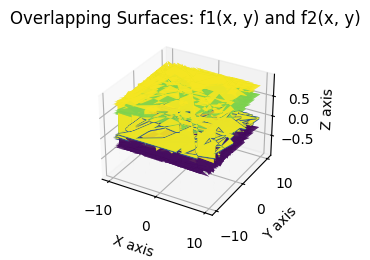

In [259]:
# Создание 3D-графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Добавляем первую поверхность
ax.plot_surface(x0, x1, all_y_data, cmap='viridis', alpha=0.7, label='f1')  # Прозрачность 0.7

# Добавляем вторую поверхность
# ax.plot_surface(x0, x1, predictions, cmap='plasma', alpha=0.7, label='f2')  # Прозрачность 0.7

# Добавим метки и заголовок
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Surface: f1(x, y)')

# Показать график
plt.show()

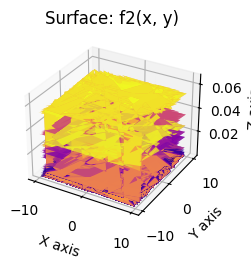

In [260]:
# Создание 3D-графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Добавляем первую поверхность
# ax.plot_surface(x0, x1, all_y_data, cmap='viridis', alpha=0.7, label='f1')  # Прозрачность 0.7

# Добавляем вторую поверхность
ax.plot_surface(x0, x1, predictions, cmap='plasma', alpha=0.7, label='f2')  # Прозрачность 0.7

# Добавим метки и заголовок
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Surface: f2(x, y)')

# Показать график
plt.show()